## BUSINESS PROBLEM

### DATA UNDERSTANDING

The columns available are:

Loan Id - Unique Identifer for each loan application

Gender - The Gender of the loan applicant

Married - Indicates whether the applicant is married or not.

Dependants - The number of dependants the applicant has

Education - The level of education of the applicant

Self-employed - Whether the applicant is self-employed or not

ApplicantIncome - The income of the applicant

CoapplicantIncome - Income of the coapplicant if any

LoanAmount - Amount of loan requested by the applicant

Loan_Amount_Term - The duration of the loan in months

Credit_History - Indicates the credit history of the applicant.IF they have a good credit history or not

Property_Area - The area where the property of the applicant is located

Loan_Status - Status of the loan application. Y(Yes) for approved and N(No) for not approved

In [296]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
import warnings

# To hide warnings
warnings.filterwarnings('ignore')

In [297]:
# Loading the data

data = pd.read_csv('train_dataset.csv')
data.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [298]:
# Creating a copy of the dataset

data2 = data.copy()
data2.head()


Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

### We'll work with the copy of the data

In [299]:
# Checking the shape of the data

data2.shape

(614, 13)

Our data has 13 columns and 614 rows

In [300]:
# Data info

data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Observation

There are some missing values according to the information above

There are both numerical(float and integer)and categorical columns

### DATA CLEANING

### 1.Gender

In [301]:
data2['Gender'].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [302]:
data2['Gender'].isna().sum()

13

In [303]:
# Checking rows with missing values in the gender column

data2[data2['Gender'].isna()]

Loan_ID Gender Married Dependents     Education Self_Employed  \
23   LP001050    NaN     Yes          2  Not Graduate            No   
126  LP001448    NaN     Yes         3+      Graduate            No   
171  LP001585    NaN     Yes         3+      Graduate            No   
188  LP001644    NaN     Yes          0      Graduate           Yes   
314  LP002024    NaN     Yes          0      Graduate            No   
334  LP002103    NaN     Yes          1      Graduate           Yes   
460  LP002478    NaN     Yes          0      Graduate           Yes   
467  LP002501    NaN     Yes          0      Graduate            No   
477  LP002530    NaN     Yes          2      Graduate            No   
507  LP002625    NaN      No          0      Graduate            No   
576  LP002872    NaN     Yes          0      Graduate            No   
588  LP002925    NaN      No          0      Graduate            No   
592  LP002933    NaN      No         3+      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
23              3365             1917.0       112.0             360.0   
126            23803                0.0       370.0             360.0   
171            51763                0.0       700.0             300.0   
188              674             5296.0       168.0             360.0   
314             2473             1843.0       159.0             360.0   
334             9833             1833.0       182.0             180.0   
460             2083             4083.0       160.0             360.0   
467            16692                0.0       110.0             360.0   
477             2873             1872.0       132.0             360.0   
507             3583                0.0        96.0             360.0   
576             3087             2210.0       136.0             360.0   
588             4750                0.0        94.0             360.0   
592             9357                0.0       292.0             360.0   

     Credit_History Property_Area Loan_Status  
23              0.0         Rural           N  
126             1.0         Rural           Y  
171             1.0         Urban           Y  
188             1.0         Rural           Y  
314             1.0         Rural           N  
334             1.0         Urban           Y  
460             NaN     Semiurban           Y  
467             1.0     Semiurban           Y  
477             0.0     Semiurban           N  
507             1.0         Urban           N  
576             0.0     Semiurban           N  
588             1.0     Semiurban           Y  
592             1.0     Semiurban           Y

Filling missing values in the Gender column with missing or unknown as it is a categorical column

In [304]:
data2['Gender'] = data2['Gender'].fillna('Missing')

In [305]:
data2.isna().sum()

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [306]:
# Now gender has no missing values

### 2.Married 

In [307]:
# Viewing rows with missing values in the Married Column

data2[data2['Married'].isna()]

Loan_ID  Gender Married Dependents Education Self_Employed  \
104  LP001357    Male     NaN        NaN  Graduate            No   
228  LP001760    Male     NaN        NaN  Graduate            No   
435  LP002393  Female     NaN        NaN  Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
104             3816              754.0       160.0             360.0   
228             4758                0.0       158.0             480.0   
435            10047                0.0         NaN             240.0   

     Credit_History Property_Area Loan_Status  
104             1.0         Urban           Y  
228             1.0     Semiurban           Y  
435             1.0     Semiurban           Y

In [308]:
# Filling in the missing values of the Married column

data2.fillna({'Married': 'Unknown'},inplace=True)

### 3.Dependents

In [309]:
# Filling missing values of the dependents column 

data2.fillna({'Dependents':'Missing'},inplace=True)

### 4.Self Employed

In [310]:
# Missing values in self employed column

In [311]:
# Checking what values the self employed column contain

data2['Self_Employed'].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [312]:
# Filling missing values in the Self Employed column

data2.fillna({'Self_Employed':'Unknown'},inplace=True)

In [313]:
data2.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### 5.LoanAmount

In [314]:
data2['LoanAmount'].dtype

dtype('float64')

In [315]:
data2['LoanAmount'].isna().sum()

22

In [316]:
# Checking missing values for the float column(Loan Amount)
data2[data2['LoanAmount'].isna()]

Loan_ID  Gender  Married Dependents     Education Self_Employed  \
0    LP001002    Male       No          0      Graduate            No   
35   LP001106    Male      Yes          0      Graduate            No   
63   LP001213    Male      Yes          1      Graduate            No   
81   LP001266    Male      Yes          1      Graduate           Yes   
95   LP001326    Male       No          0      Graduate       Unknown   
102  LP001350    Male      Yes    Missing      Graduate            No   
103  LP001356    Male      Yes          0      Graduate            No   
113  LP001392  Female       No          1      Graduate           Yes   
127  LP001449    Male       No          0      Graduate            No   
202  LP001682    Male      Yes         3+  Not Graduate            No   
284  LP001922    Male      Yes          0      Graduate            No   
305  LP001990    Male       No          0  Not Graduate            No   
322  LP002054    Male      Yes          2  Not Graduate            No   
338  LP002113  Female       No         3+  Not Graduate            No   
387  LP002243    Male      Yes          0  Not Graduate            No   
435  LP002393  Female  Unknown    Missing      Graduate            No   
437  LP002401    Male      Yes          0      Graduate            No   
479  LP002533    Male      Yes          2      Graduate            No   
524  LP002697    Male       No          0      Graduate            No   
550  LP002778    Male      Yes          2      Graduate           Yes   
551  LP002784    Male      Yes          1  Not Graduate            No   
605  LP002960    Male      Yes          0  Not Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN             360.0   
35              2275             2067.0         NaN             360.0   
63              4945                0.0         NaN             360.0   
81              2395                0.0         NaN             360.0   
95              6782                0.0         NaN             360.0   
102            13650                0.0         NaN             360.0   
103             4652             3583.0         NaN             360.0   
113             7451                0.0         NaN             360.0   
127             3865             1640.0         NaN             360.0   
202             3992                0.0         NaN             180.0   
284            20667                0.0         NaN             360.0   
305             2000                0.0         NaN             360.0   
322             3601             1590.0         NaN             360.0   
338             1830                0.0         NaN             360.0   
387             3010             3136.0         NaN             360.0   
435            10047                0.0         NaN             240.0   
437             2213             1125.0         NaN             360.0   
479             2947             1603.0         NaN             360.0   
524             4680             2087.0         NaN             360.0   
550             6633                0.0         NaN             360.0   
551             2492             2375.0         NaN             360.0   
605             2400             3800.0         NaN             180.0   

     Credit_History Property_Area Loan_Status  
0               1.0         Urban           Y  
35              1.0         Urban           Y  
63              0.0         Rural           N  
81              1.0     Semiurban           Y  
95              NaN         Urban           N  
102             1.0         Urban           Y  
103             1.0     Semiurban           Y  
113             1.0     Semiurban           Y  
127             1.0         Rural           Y  
202             1.0         Urban           N  
284             1.0         Rural           N  
305             1.0         Urban           N  
322             1.0   

In [317]:
data2.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

<Axes: ylabel='LoanAmount'>

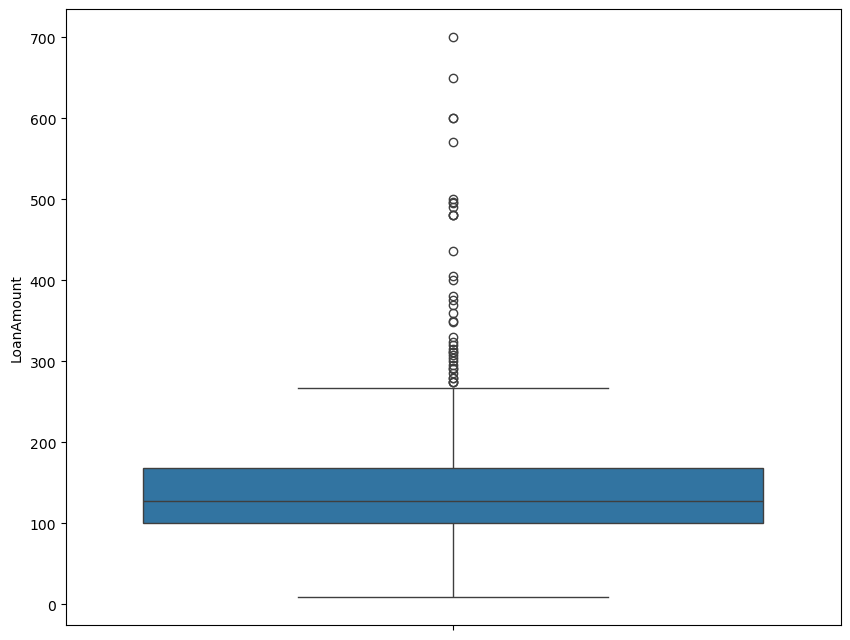

In [318]:
# Checking if the data is normally distributed and does not have outliers so as to impute Loan Amount with mean

plt.figure(figsize=(10,8))
sns.boxplot(data2['LoanAmount'])

Since Loan Amount has outliers, and mean is affected by outliers, then the missing values will be filled with median

Text(0, 0.5, 'Frequency')

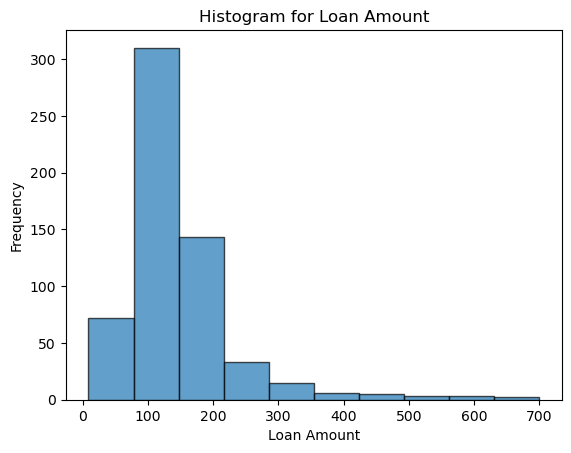

In [319]:
plt.hist(data2['LoanAmount'],edgecolor='k',alpha=0.7)
plt.title('Histogram for Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')

The above histogram does not form a symmetric bell curve or bell shape. Meaning that Loan Amount is not normally distributed.
This and the fact that the column has outliers means that the better option for filling in missing values in this column is median

### Filling in missing values in the LoanAmount column with the median

In [320]:
data2['LoanAmount'] = data2['LoanAmount'].fillna(data2['LoanAmount'].median())

In [321]:
# Checking if there are still missing values in that column

data2['LoanAmount'].isna().sum()

0

So there are no missing values in the LoanAmount Column. Now let's check which other columns have missing values

In [322]:
data2.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### 6.Credit History

In [323]:
data2['Credit_History'].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

475 loan applicants have a good credit history and 89 applicants have a bad credit history

In [324]:
data2['Credit_History']

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
609    1.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: Credit_History, Length: 614, dtype: float64

If I fill the credit history column values with 0 or 1, I will be making my data bias because I'll be giving people with bad credit history a good one and the opposite is true.

So I'll instead drop the rows with missing values in the credit history column

In [325]:
data2 = data2.dropna(subset=['Credit_History'])

In [326]:
data2.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

Changing the data type of Credit History from float to int so that we can have binary(1 for good credit history and 0 for a bad credit history) instead of 1.0 and 0.0
Binary will be an easier format to understand compared to float values.There's no way one can have a credit history of 1.0 or 0.5

In [327]:
data2['Credit_History'] = data2['Credit_History'].astype(int)

### 7. Loan_Amount_Term

The only remaining column that we haven't cleared the missing values is the Loan_Amount_Term

In [328]:
data2['Loan_Amount_Term']

0      360.0
1      360.0
2      360.0
3      360.0
4      360.0
       ...  
609    360.0
610    180.0
611    360.0
612    360.0
613    360.0
Name: Loan_Amount_Term, Length: 564, dtype: float64

In [329]:
data2['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    470
180.0     43
480.0     14
300.0     10
120.0      3
240.0      3
84.0       3
60.0       2
36.0       2
Name: count, dtype: int64

In [330]:
data2['Loan_Amount_Term'].median()

360.0

In [331]:
data2.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

For handling the missing values in the Loan Amount Term column, I will not drop the missing values because it'll lead to loss of data.
And because there are only 14 missing values, filling them with one of the measures of central tendency will not really lead to bias in the data cause it's a small percentage of missing data.

Hence for me to know what central measure of tendecy I will use, I'll check for outliers and normality in the data just like I did with the LoanAmount column

<Axes: >

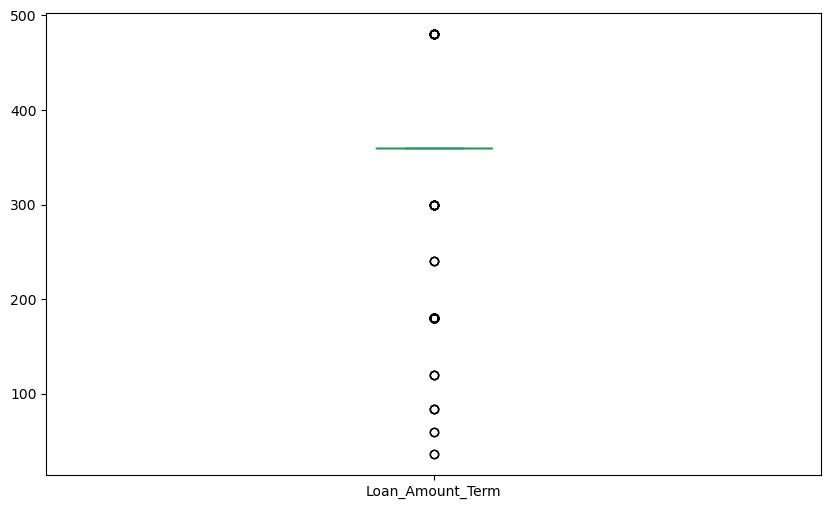

In [332]:
# Checking for outliers using a box plot

data2['Loan_Amount_Term'].plot(kind='box', figsize=(10,6))

From the above plot, there are very few, close to none extreme values in the Loan Amount Term column.

In [333]:
data2

Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0       128.0             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History Property_Area Loan_Status  
0                 1         Urban           Y  
1                 1         Rural           N  
2                 1         Urban           Y  
3                 1         Urban           Y  
4                 1         Urban           Y  
..              ...           ...         ...  
609               1         Rural           Y  
610               1         Rural           Y  
611               1         Urban           Y  
612               1         Urban           Y  
613               0     Semiurban           N  

[564 rows x 13 columns]

In [334]:
data2.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [335]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 564 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            564 non-null    object 
 1   Gender             564 non-null    object 
 2   Married            564 non-null    object 
 3   Dependents         564 non-null    object 
 4   Education          564 non-null    object 
 5   Self_Employed      564 non-null    object 
 6   ApplicantIncome    564 non-null    int64  
 7   CoapplicantIncome  564 non-null    float64
 8   LoanAmount         564 non-null    float64
 9   Loan_Amount_Term   550 non-null    float64
 10  Credit_History     564 non-null    int32  
 11  Property_Area      564 non-null    object 
 12  Loan_Status        564 non-null    object 
dtypes: float64(3), int32(1), int64(1), object(8)
memory usage: 59.5+ KB


In [336]:
data2['Loan_Amount_Term']

0      360.0
1      360.0
2      360.0
3      360.0
4      360.0
       ...  
609    360.0
610    180.0
611    360.0
612    360.0
613    360.0
Name: Loan_Amount_Term, Length: 564, dtype: float64

Checking for normality on the Loan Amount Column using a histogram

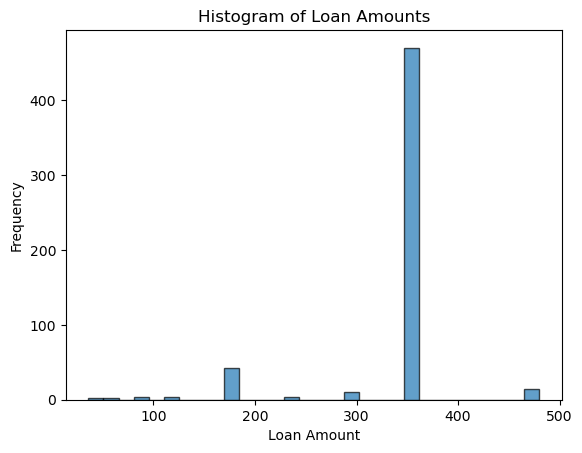

In [337]:
plt.hist(data2['Loan_Amount_Term'],bins=30,edgecolor='k',alpha=0.7)
plt.title('Histogram of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

From the above histogram, the data for Loan Amount is not normally distributed because the histogram could have formed a bell shape/symmetric bell curve.It does not form a peak at the center.

Because of this, I'll fill the missing values in this column with the median as it appropriate for data that does not follow a normal distribution

In [338]:
data2['Loan_Amount_Term'] = data2['Loan_Amount_Term'].fillna(data2['Loan_Amount_Term'].median())

In [339]:
# Checking if the Loan Amount Column still has missing values

data2.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Now we've dealt with the missing values in each column

In [340]:
# Checking the data once again to show what we can correct in any of the columns

data2

Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0       128.0             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History Property_Area Loan_Status  
0                 1         Urban           Y  
1                 1         Rural           N  
2                 1         Urban           Y  
3                 1         Urban           Y  
4                 1         Urban           Y  
..              ...           ...         ...  
609               1         Rural           Y  
610               1         Rural           Y  
611               1         Urban           Y  
612               1         Urban           Y  
613               0     Semiurban           N  

[564 rows x 13 columns]

In [341]:
# Checking the data types of each column

data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 564 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            564 non-null    object 
 1   Gender             564 non-null    object 
 2   Married            564 non-null    object 
 3   Dependents         564 non-null    object 
 4   Education          564 non-null    object 
 5   Self_Employed      564 non-null    object 
 6   ApplicantIncome    564 non-null    int64  
 7   CoapplicantIncome  564 non-null    float64
 8   LoanAmount         564 non-null    float64
 9   Loan_Amount_Term   564 non-null    float64
 10  Credit_History     564 non-null    int32  
 11  Property_Area      564 non-null    object 
 12  Loan_Status        564 non-null    object 
dtypes: float64(3), int32(1), int64(1), object(8)
memory usage: 59.5+ KB


### DATA VISUALIZATION

#### 1.UNIVARIATE ANALYSIS

Creating a function below to plot the pie charts for the categorical variables

In [342]:
# Function to plot pie charts

def pie_charts(df,column_name):
    value_counts = df[column_name].value_counts()

    column_counts = pd.DataFrame({
        column_name: value_counts.index,
        'Counts': value_counts.values
    })

    # Plotting a pie chart
    fig = px.pie(column_counts,values='Counts', names=column_name).update_layout(width=800,height=600)

    # Layout
    fig.update_layout(width=800, height=600)

    return fig

In [343]:
# Gender

pie_charts(data2,'Gender')

From the Gender column, most loan applicants are Male.This can be attributed to :

Most males tend to have greater financial responsibilities compared to females.

Income disparity( Most men generally have higher income making them more likely to meet income requirements needed for loan approval)

In [344]:
pie_charts(data2,'Married')

Married people have families to feed and other financial obligations to undertake. This may force them to take loans so as to take care of the needs awaiting them in their families.

Married couples might be more focused on building assets and securing their financial future, leading them to apply for various types of loans, including home loans, car loans, and personal loans.

In [345]:
pie_charts(data2,'Dependents')

56% of loan applicants in the Dependents column, which is actually the highest percentage, have 0 dependents.

Individuals with no dependents may have higher disposable incomes and better financial stability, making them more attractive to lenders since they may be perceived as lower risk. They might have fewer financial obligations, allowing them to qualify more easily for loans due to higher likelihood of timely loan repayments.

In [346]:
# Grouping data by 'Dependents' and calculating the mean loan amount
grouped_data = data2.groupby('Dependents')['LoanAmount'].mean().reset_index()

fig = px.bar(grouped_data, x='Dependents', y='LoanAmount', title='Average Loan Amount by Number of Dependents')
fig.show()


In [347]:
# Self employed

pie_charts(data2,'Self_Employed')

In [348]:
# Property Area

pie_charts(data2,'Property_Area')

Most loan applicants live in semiurban areas. Semi-urban areas consist of infrastructure and services that are better that rural areas and not as expensive as urban areas.

A combination of economic opportunities, affordable lifestyle and other factors make semi-urban areas attractive for both living and investing leading to higher loan applications for the population to improve quality of life and financial standing

In [349]:
# Loan Status

pie_charts(data2,'Loan_Status')

In [350]:
# Credit History

pie_charts(data2,'Credit_History')

Most loan applicants have a good credit history.Meaning most of them pay back their loans on time.

In [351]:
px.histogram(data2,x='ApplicantIncome',nbins=20)

Most loan applicants, earn between 0 to 25k .This gives us an economic insight that is, if most of them earn between 0 to 25k (which is low income), then they depend on loans to meet their needs such as housing, education , healthcare and their businesses.

This indicates financial support for low income earners.

From the histogram, those earning 40k and above do not really rely on loans.

### Bivariate Analysis

In [352]:
data2.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [353]:
data2['Loan_Amount_Term']

0      360.0
1      360.0
2      360.0
3      360.0
4      360.0
       ...  
609    360.0
610    180.0
611    360.0
612    360.0
613    360.0
Name: Loan_Amount_Term, Length: 564, dtype: float64

In [354]:
fig = px.scatter(data2, x='Dependents', y='LoanAmount', title='Loan Amount vs. Number of Dependents')
fig.show()


In the scatter plot above, it's clear that loan applicants with 3+ dependents take higher loan amounts ranging around 700k.This can be so that they may be able to take care of their independent financial responsibilities together with those of their dependents.

They have to take care of the higher daily living expenses.

In [355]:
px.bar(data2,x='Gender',y='LoanAmount',color='Gender',color_discrete_sequence=['cornflowerblue','coral','green'])

From the vizz, Male take higher amounts of loans compared to Female.This may be attributed to the following reasons:


Education vs Loans

In [356]:
px.bar(data2,'Education', y='LoanAmount',color='Education',color_discrete_sequence=['cornflowerblue','coral','green'])

Graduates take the highes loan amounts as compared to non-graduates

Education vs LoanAmount

In [357]:
import plotly.io as pio
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'iframe'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

In [358]:
import plotly.io as pio
pio.renderers.default = 'iframe'

In [359]:
import plotly.express as px

# Creating the figure
fig = px.bar(data2, x='Education', y='LoanAmount',color='Education',color_discrete_sequence=['blue','orange'])

# Show the figure
fig.show()

Most graduates take higher loan amounts as compared to non-graduates.This may be due to graduates having jobs and can afford to pay for the loans they take.Hence they take higher amounts of loans unlike non-graduates

In [360]:
# Creating the figure
px.bar(data2, x='Self_Employed', y='LoanAmount')


In [361]:
px.bar(data2, x='Property_Area', y='LoanAmount',color='Property_Area',color_discrete_sequence=['cornflowerblue','coral','green'])

In [362]:
px.bar(data2, x='Loan_Status')


In [363]:
data2.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [364]:
px.bar(data2, x='Dependents', y='LoanAmount',color='Dependents',color_discrete_sequence=['cornflowerblue','coral','green','red','black'])

From the histogram above, most people earn less than 25k

In [365]:
# px.bar(data2, x='Property_Area', y='Loan_Amount_Term',color='Property_Area',color_discrete_sequence=['cornflowerblue','coral','green'])

In [366]:
data2['Loan_Amount_Term']

0      360.0
1      360.0
2      360.0
3      360.0
4      360.0
       ...  
609    360.0
610    180.0
611    360.0
612    360.0
613    360.0
Name: Loan_Amount_Term, Length: 564, dtype: float64

MULTIVARIATE ANALYSIS

In [367]:
data2.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History         int32
Property_Area         object
Loan_Status           object
dtype: object

<Axes: >

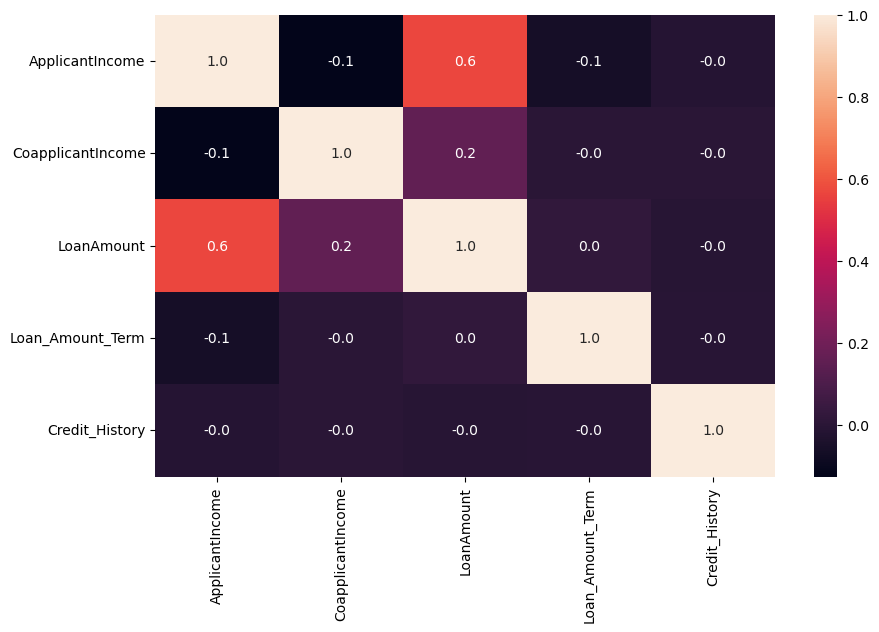

In [368]:
plt.figure(figsize=(10,6))
sns.heatmap(data2[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']].corr(),annot=True,fmt='.1f')

From the heat map, Loan Amount and Applicant Income have a strong positive correlation of 0.6. This is sensible because the amount of loan one takes depend on the income they get.

For a low income, one can't take huge amount of loans cause of the struggle in paying up the loan.

If one has a high income, they are capable of taking loans because they can pay up in time

In [369]:
data2

Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0       128.0             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History Property_Area Loan_Status  
0                 1         Urban           Y  
1                 1         Rural           N  
2                 1         Urban           Y  
3                 1         Urban           Y  
4                 1         Urban           Y  
..              ...           ...         ...  
609               1         Rural           Y  
610               1         Rural           Y  
611               1         Urban           Y  
612               1         Urban           Y  
613               0     Semiurban           N  

[564 rows x 13 columns]

In [370]:
px.scatter(data2,x='CoapplicantIncome',y='LoanAmount')

The above plot is a negative correlation. The lower the coapplicant income , the higher the loan amount of the applicant.It's expected that the opposite is true.

This is clearly indicating that correlation is not causation since there may be other hidden factors that affect the relationship between the coapplicant income and loan amount.

DATA PREPROCESSING

In [371]:
data2

Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0       128.0             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History Property_Area Loan_Status  
0                 1         Urban           Y  
1                 1         Rural           N  
2                 1         Urban           Y  
3                 1         Urban           Y  
4                 1         Urban           Y  
..              ...           ...         ...  
609               1         Rural           Y  
610               1         Rural           Y  
611               1         Urban           Y  
612               1         Urban           Y  
613               0     Semiurban           N  

[564 rows x 13 columns]

Dropping the identifier column as it contains unique values for each record, that do not provide meaningful information about the target variable and will not really contribute in modelling hence I'll drop it.

In [372]:
data2.drop('Loan_ID',axis=1,inplace=True)

In [373]:
data2

Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0      Male      No          0      Graduate            No             5849   
1      Male     Yes          1      Graduate            No             4583   
2      Male     Yes          0      Graduate           Yes             3000   
3      Male     Yes          0  Not Graduate            No             2583   
4      Male      No          0      Graduate            No             6000   
..      ...     ...        ...           ...           ...              ...   
609  Female      No          0      Graduate            No             2900   
610    Male     Yes         3+      Graduate            No             4106   
611    Male     Yes          1      Graduate            No             8072   
612    Male     Yes          2      Graduate            No             7583   
613  Female      No          0      Graduate           Yes             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                  0.0       128.0             360.0               1   
1               1508.0       128.0             360.0               1   
2                  0.0        66.0             360.0               1   
3               2358.0       120.0             360.0               1   
4                  0.0       141.0             360.0               1   
..                 ...         ...               ...             ...   
609                0.0        71.0             360.0               1   
610                0.0        40.0             180.0               1   
611              240.0       253.0             360.0               1   
612                0.0       187.0             360.0               1   
613                0.0       133.0             360.0               0   

    Property_Area Loan_Status  
0           Urban           Y  
1           Rural           N  
2           Urban           Y  
3           Urban           Y  
4           Urban           Y  
..            ...         ...  
609         Rural           Y  
610         Rural           Y  
611         Urban           Y  
612         Urban           Y  
613     Semiurban           N  

[564 rows x 12 columns]

In [374]:
data2.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

One-Hot Encoding

In [375]:
data2.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History         int32
Property_Area         object
Loan_Status           object
dtype: object

In [376]:
data2['Property_Area']

0          Urban
1          Rural
2          Urban
3          Urban
4          Urban
         ...    
609        Rural
610        Rural
611        Urban
612        Urban
613    Semiurban
Name: Property_Area, Length: 564, dtype: object

I'll perform one-hot encoding on most of the categorical columns, since each of them do not have many unique values, and they do not have any order so I cannot consider ordinal encoding and label encoding

In [377]:
data2

Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0      Male      No          0      Graduate            No             5849   
1      Male     Yes          1      Graduate            No             4583   
2      Male     Yes          0      Graduate           Yes             3000   
3      Male     Yes          0  Not Graduate            No             2583   
4      Male      No          0      Graduate            No             6000   
..      ...     ...        ...           ...           ...              ...   
609  Female      No          0      Graduate            No             2900   
610    Male     Yes         3+      Graduate            No             4106   
611    Male     Yes          1      Graduate            No             8072   
612    Male     Yes          2      Graduate            No             7583   
613  Female      No          0      Graduate           Yes             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                  0.0       128.0             360.0               1   
1               1508.0       128.0             360.0               1   
2                  0.0        66.0             360.0               1   
3               2358.0       120.0             360.0               1   
4                  0.0       141.0             360.0               1   
..                 ...         ...               ...             ...   
609                0.0        71.0             360.0               1   
610                0.0        40.0             180.0               1   
611              240.0       253.0             360.0               1   
612                0.0       187.0             360.0               1   
613                0.0       133.0             360.0               0   

    Property_Area Loan_Status  
0           Urban           Y  
1           Rural           N  
2           Urban           Y  
3           Urban           Y  
4           Urban           Y  
..            ...         ...  
609         Rural           Y  
610         Rural           Y  
611         Urban           Y  
612         Urban           Y  
613     Semiurban           N  

[564 rows x 12 columns]

From the print statements above, X_train, X_test , y_train and y_test are equally split

In [378]:
data2.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History         int32
Property_Area         object
Loan_Status           object
dtype: object

So instead of one hot encoding Self_Employed, Loan Status and Married which have yes and no values as this will lead to increase in the number of columns, I'll map yes values to 1(True) and no to 0(False) as yes and no are similar to true and false respectively.

Cause if it is true the person is married then they'll most likely say yes they are married and if it is false(not married) then they'll answer no

In [379]:
# Map 'yes' to 1 and 'no' to 0
binary_mapping = {'yes': 1, 
                  'no': 0,
                  'Y': 1,
                  'N': 0
}
data2[['Married', 'Self_Employed','Loan_Status']] = data2[['Married', 'Self_Employed','Loan_Status']].replace(binary_mapping)
data2

Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0      Male      No          0      Graduate            No             5849   
1      Male     Yes          1      Graduate            No             4583   
2      Male     Yes          0      Graduate           Yes             3000   
3      Male     Yes          0  Not Graduate            No             2583   
4      Male      No          0      Graduate            No             6000   
..      ...     ...        ...           ...           ...              ...   
609  Female      No          0      Graduate            No             2900   
610    Male     Yes         3+      Graduate            No             4106   
611    Male     Yes          1      Graduate            No             8072   
612    Male     Yes          2      Graduate            No             7583   
613  Female      No          0      Graduate           Yes             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                  0.0       128.0             360.0               1   
1               1508.0       128.0             360.0               1   
2                  0.0        66.0             360.0               1   
3               2358.0       120.0             360.0               1   
4                  0.0       141.0             360.0               1   
..                 ...         ...               ...             ...   
609                0.0        71.0             360.0               1   
610                0.0        40.0             180.0               1   
611              240.0       253.0             360.0               1   
612                0.0       187.0             360.0               1   
613                0.0       133.0             360.0               0   

    Property_Area  Loan_Status  
0           Urban            1  
1           Rural            0  
2           Urban            1  
3           Urban            1  
4           Urban            1  
..            ...          ...  
609         Rural            1  
610         Rural            1  
611         Urban            1  
612         Urban            1  
613     Semiurban            0  

[564 rows x 12 columns]

In [380]:
# Splitting the dataset into train and test set

X = data2.drop('Loan_Status',axis=1)
y = data2['Loan_Status']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [381]:
print(f"X_train",{len(X_train)})
print(f"X_test",{len(X_test)})
print(f"y_train",{len(y_train)})
print(f"y_test",{len(y_test)})

X_train {451}
X_test {113}
y_train {451}
y_test {113}


I'll include the parameter drop_first=False so as to avoid mulitcollinearity

In [382]:
X_train_encoded = pd.get_dummies(X_train,columns=['Gender','Married','Property_Area','Education','Self_Employed'],drop_first=True)
X_test_encoded = pd.get_dummies(X_test,columns=['Gender','Married','Property_Area','Education','Self_Employed'],drop_first=True)

In [383]:
X_train_encoded['Dependents'].unique()

array(['3+', '0', 'Missing', '2', '1'], dtype=object)

There is a meaningful order (e.g., having 2 dependents is more than having 1, and having 3+ is even more), then you should treat this column as ordinal. In this case, using label encoding might be more appropriate.

Though if I use automatic label encoding, 0 dependents will be 0, 1 and 2 will remain the same.3+ dependents will be 3 and missing will be 4 .

This will affect how our model works because many machine learning algorithms assume that higher numerical values indicate a higher importance or value.Treating "unknown" as a higher number could lead to misleading interpretations.

Hence, I will use custome label encoding (Assigning the values myself)

In [384]:
# Custom mapping for label encoding

dependents_mapping = {'0': 0,'1': 1,'2': 2,'3+': 3,'Missing': -1}
X_train_encoded['Dependents'] = X_train_encoded['Dependents'].map(dependents_mapping)
X_test_encoded['Dependents'] = X_test_encoded['Dependents'].map(dependents_mapping)

In [385]:
X_train_encoded

Dependents  ApplicantIncome  CoapplicantIncome  LoanAmount  \
359           3             5167             3167.0       200.0   
127           0             3865             1640.0       128.0   
228          -1             4758                0.0       158.0   
0             0             5849                0.0       128.0   
482           0             2083             3150.0       128.0   
..          ...              ...                ...         ...   
75            0             3750                0.0       113.0   
114           0             5050                0.0       118.0   
292           2             3153             1560.0       134.0   
472           3             4691                0.0       100.0   
110           0             5316                0.0       136.0   

     Loan_Amount_Term  Credit_History  Gender_Male  Gender_Missing  \
359             360.0               1         True           False   
127             360.0               1         True           False   
228             480.0               1         True           False   
0               360.0               1         True           False   
482             360.0               1         True           False   
..                ...             ...          ...             ...   
75              480.0               1         True           False   
114             360.0               1         True           False   
292             360.0               1         True           False   
472             360.0               1         True           False   
110             360.0               1         True           False   

     Married_Unknown  Married_Yes  Property_Area_Semiurban  \
359            False         True                     True   
127            False        False                    False   
228             True        False                     True   
0              False        False                    False   
482            False         True                     True   
..               ...          ...                      ...   
75             False        False                    False   
114            False        False                     True   
292            False         True                    False   
472            False         True                     True   
110            False        False                    False   

     Property_Area_Urban  Education_Not Graduate  Self_Employed_Unknown  \
359                False                   False                  False   
127                False                   False                  False   
228                False                   False                  False   
0                   True                   False                  False   
482                False                   False                  False   
..                   ...                     ...                    ...   
75                  True                   False                  False   
114                False                   False                   True   
292                 True                   False                  False   
472                False                   False                  False   
110                 True                   False                  False   

     Self_Employed_Yes  
359              False  
127              False  
228              False  
0                False  
482              False  
..                 ...  
75               False  
114              False  
292              False  
472              False  
110              False  

[451 rows x 15 columns]

In [386]:
X_test_encoded

Dependents  ApplicantIncome  CoapplicantIncome  LoanAmount  \
586           0             2297             1522.0       104.0   
570           1             3417             1750.0       186.0   
253           1             2661             7101.0       279.0   
571          -1             5116             1451.0       165.0   
528           1             2679             1302.0        94.0   
..          ...              ...                ...         ...   
208           0             2479                0.0        59.0   
96            0             2484             2302.0       137.0   
569           0             3166             2064.0       104.0   
402           0             2500            20000.0       103.0   
36            0             1828             1330.0       100.0   

     Loan_Amount_Term  Credit_History  Gender_Male  Gender_Missing  \
586             360.0               1         True           False   
570             360.0               1         True           False   
253             180.0               1         True           False   
571             360.0               0         True           False   
528             360.0               1         True           False   
..                ...             ...          ...             ...   
208             360.0               1         True           False   
96              360.0               1        False           False   
569             360.0               0         True           False   
402             360.0               1         True           False   
36              360.0               0         True           False   

     Married_Unknown  Married_Yes  Property_Area_Semiurban  \
586            False         True                    False   
570            False         True                    False   
253            False         True                     True   
571            False         True                    False   
528            False        False                     True   
..               ...          ...                      ...   
208            False        False                    False   
96             False         True                     True   
569            False         True                    False   
402            False        False                     True   
36             False         True                    False   

     Property_Area_Urban  Education_Not Graduate  Self_Employed_Unknown  \
586                 True                   False                  False   
570                 True                   False                  False   
253                False                    True                  False   
571                 True                   False                  False   
528                False                    True                  False   
..                   ...                     ...                    ...   
208                 True                   False                  False   
96                 False                   False                  False   
569                 True                   False                  False   
402                False                   False                  False   
36                  True                   False                  False   

     Self_Employed_Yes  
586              False  
570              False  
253              False  
571              False  
528              False  
..                 ...  
208              False  
96               False  
569              False  
402              False  
36               False  

[113 rows x 15 columns]

In [387]:
X_train_encoded['Dependents'].unique()

array([ 3,  0, -1,  2,  1], dtype=int64)

### CHECKING FOR CLASS IMBALANCE

In [388]:
y_train.value_counts(normalize=True)*100

Loan_Status
1    68.957871
0    31.042129
Name: proportion, dtype: float64

This indicates a moderate class imbalance.Since it's moderate, I'll first evaluate the model's performance carefully. If the performance on the minority class is significantly worse, then we'll apply techniques to handle the imbalance to improve your model's overall performance and reliability.

Hence,I'll not perform any class imbalance techniques before modelling

### STANDARDIZATION

#### 1.Applicant Income

In [389]:
print(X_train_encoded['ApplicantIncome'].max())
print(X_train_encoded['ApplicantIncome'].min())

63337
150


The Applicant Income has wide range of values. The minimum being 150 and the maximum being 63337.The significant variation in scale can lead to  several issues in model training such as:

1. Features with larger scales can dominate the learning process causing the model to weigh them more heavily than features with smaller scales.This can skew the results leading to suboptimal model performance.
2. Algorithms that rely on distance metrics such as KNN and SVM can be sensitive to the scale of features.

Hence I'll standardixe the ApplicantIncome column to ensure all features contribute equally to the model

#### 2. Coapplicant Income

In [390]:
print(X_train_encoded['CoapplicantIncome'].max())
print(X_train_encoded['CoapplicantIncome'].min())



33837.0
0.0


#### 3. Loan Amount

In [391]:
print(X_train_encoded['LoanAmount'].max())
print(X_train_encoded['LoanAmount'].min())

600.0
9.0


From the above, these are the columns I'll standardize:

LoanAmount,Applicant Income and Coapplicant Income

### 4. Loan Amount Term

In [392]:
print(X_train_encoded['Loan_Amount_Term'].max())
print(X_train_encoded['Loan_Amount_Term'].min())

480.0
36.0


In [393]:
X_train_encoded

Dependents  ApplicantIncome  CoapplicantIncome  LoanAmount  \
359           3             5167             3167.0       200.0   
127           0             3865             1640.0       128.0   
228          -1             4758                0.0       158.0   
0             0             5849                0.0       128.0   
482           0             2083             3150.0       128.0   
..          ...              ...                ...         ...   
75            0             3750                0.0       113.0   
114           0             5050                0.0       118.0   
292           2             3153             1560.0       134.0   
472           3             4691                0.0       100.0   
110           0             5316                0.0       136.0   

     Loan_Amount_Term  Credit_History  Gender_Male  Gender_Missing  \
359             360.0               1         True           False   
127             360.0               1         True           False   
228             480.0               1         True           False   
0               360.0               1         True           False   
482             360.0               1         True           False   
..                ...             ...          ...             ...   
75              480.0               1         True           False   
114             360.0               1         True           False   
292             360.0               1         True           False   
472             360.0               1         True           False   
110             360.0               1         True           False   

     Married_Unknown  Married_Yes  Property_Area_Semiurban  \
359            False         True                     True   
127            False        False                    False   
228             True        False                     True   
0              False        False                    False   
482            False         True                     True   
..               ...          ...                      ...   
75             False        False                    False   
114            False        False                     True   
292            False         True                    False   
472            False         True                     True   
110            False        False                    False   

     Property_Area_Urban  Education_Not Graduate  Self_Employed_Unknown  \
359                False                   False                  False   
127                False                   False                  False   
228                False                   False                  False   
0                   True                   False                  False   
482                False                   False                  False   
..                   ...                     ...                    ...   
75                  True                   False                  False   
114                False                   False                   True   
292                 True                   False                  False   
472                False                   False                  False   
110                 True                   False                  False   

     Self_Employed_Yes  
359              False  
127              False  
228              False  
0                False  
482              False  
..                 ...  
75               False  
114              False  
292              False  
472              False  
110              False  

[451 rows x 15 columns]

In [394]:
scaler = StandardScaler()

# Specifying columns to standardize
columns_to_standardize = ['LoanAmount','ApplicantIncome','CoapplicantIncome','Loan_Amount_Term']

X_train_encoded[columns_to_standardize] = scaler.fit_transform(X_train_encoded[columns_to_standardize])
X_test_encoded[columns_to_standardize] = scaler.fit_transform(X_test_encoded[columns_to_standardize])


In [395]:
X_train_encoded

Dependents  ApplicantIncome  CoapplicantIncome  LoanAmount  \
359           3        -0.031711           0.727248    0.723460   
127           0        -0.284096           0.064849   -0.194240   
228          -1        -0.110993          -0.646567    0.188135   
0             0         0.100491          -0.646567   -0.194240   
482           0        -0.629527           0.719873   -0.194240   
..          ...              ...                ...         ...   
75            0        -0.306388          -0.646567   -0.385427   
114           0        -0.054390          -0.646567   -0.321698   
292           2        -0.422113           0.030146   -0.117765   
472           3        -0.123981          -0.646567   -0.551123   
110           0        -0.002828          -0.646567   -0.092273   

     Loan_Amount_Term  Credit_History  Gender_Male  Gender_Missing  \
359          0.286311               1         True           False   
127          0.286311               1         True           False   
228          2.110130               1         True           False   
0            0.286311               1         True           False   
482          0.286311               1         True           False   
..                ...             ...          ...             ...   
75           2.110130               1         True           False   
114          0.286311               1         True           False   
292          0.286311               1         True           False   
472          0.286311               1         True           False   
110          0.286311               1         True           False   

     Married_Unknown  Married_Yes  Property_Area_Semiurban  \
359            False         True                     True   
127            False        False                    False   
228             True        False                     True   
0              False        False                    False   
482            False         True                     True   
..               ...          ...                      ...   
75             False        False                    False   
114            False        False                     True   
292            False         True                    False   
472            False         True                     True   
110            False        False                    False   

     Property_Area_Urban  Education_Not Graduate  Self_Employed_Unknown  \
359                False                   False                  False   
127                False                   False                  False   
228                False                   False                  False   
0                   True                   False                  False   
482                False                   False                  False   
..                   ...                     ...                    ...   
75                  True                   False                  False   
114                False                   False                   True   
292                 True                   False                  False   
472                False                   False                  False   
110                 True                   False                  False   

     Self_Employed_Yes  
359              False  
127              False  
228              False  
0                False  
482              False  
..                 ...  
75               False  
114              False  
292              False  
472              False  
110              False  

[451 rows x 15 columns]

In [396]:
X_test_encoded

Dependents  ApplicantIncome  CoapplicantIncome  LoanAmount  \
586           0        -0.392619          -0.055353   -0.484329   
570           1        -0.274145           0.019828    0.392535   
253           1        -0.354115           1.784262    1.387027   
571          -1        -0.094423          -0.078764    0.167972   
528           1        -0.352211          -0.127895   -0.591263   
..          ...              ...                ...         ...   
208           0        -0.373367          -0.557216   -0.965534   
96            0        -0.372838           0.201844   -0.131444   
569           0        -0.300696           0.123366   -0.484329   
402           0        -0.371146           6.037568   -0.495022   
36            0        -0.442230          -0.118663   -0.527102   

     Loan_Amount_Term  Credit_History  Gender_Male  Gender_Missing  \
586          0.213784               1         True           False   
570          0.213784               1         True           False   
253         -3.080430               1         True           False   
571          0.213784               0         True           False   
528          0.213784               1         True           False   
..                ...             ...          ...             ...   
208          0.213784               1         True           False   
96           0.213784               1        False           False   
569          0.213784               0         True           False   
402          0.213784               1         True           False   
36           0.213784               0         True           False   

     Married_Unknown  Married_Yes  Property_Area_Semiurban  \
586            False         True                    False   
570            False         True                    False   
253            False         True                     True   
571            False         True                    False   
528            False        False                     True   
..               ...          ...                      ...   
208            False        False                    False   
96             False         True                     True   
569            False         True                    False   
402            False        False                     True   
36             False         True                    False   

     Property_Area_Urban  Education_Not Graduate  Self_Employed_Unknown  \
586                 True                   False                  False   
570                 True                   False                  False   
253                False                    True                  False   
571                 True                   False                  False   
528                False                    True                  False   
..                   ...                     ...                    ...   
208                 True                   False                  False   
96                 False                   False                  False   
569                 True                   False                  False   
402                False                   False                  False   
36                  True                   False                  False   

     Self_Employed_Yes  
586              False  
570              False  
253              False  
571              False  
528              False  
..                 ...  
208              False  
96               False  
569              False  
402              False  
36               False  

[113 rows x 15 columns]

In [397]:
# Converting boolean(True and False) to 1s and 0s 

X_train_encoded.astype(int)
X_test_encoded.astype(int)

Dependents  ApplicantIncome  CoapplicantIncome  LoanAmount  \
586           0                0                  0           0   
570           1                0                  0           0   
253           1                0                  1           1   
571          -1                0                  0           0   
528           1                0                  0           0   
..          ...              ...                ...         ...   
208           0                0                  0           0   
96            0                0                  0           0   
569           0                0                  0           0   
402           0                0                  6           0   
36            0                0                  0           0   

     Loan_Amount_Term  Credit_History  Gender_Male  Gender_Missing  \
586                 0               1            1               0   
570                 0               1            1               0   
253                -3               1            1               0   
571                 0               0            1               0   
528                 0               1            1               0   
..                ...             ...          ...             ...   
208                 0               1            1               0   
96                  0               1            0               0   
569                 0               0            1               0   
402                 0               1            1               0   
36                  0               0            1               0   

     Married_Unknown  Married_Yes  Property_Area_Semiurban  \
586                0            1                        0   
570                0            1                        0   
253                0            1                        1   
571                0            1                        0   
528                0            0                        1   
..               ...          ...                      ...   
208                0            0                        0   
96                 0            1                        1   
569                0            1                        0   
402                0            0                        1   
36                 0            1                        0   

     Property_Area_Urban  Education_Not Graduate  Self_Employed_Unknown  \
586                    1                       0                      0   
570                    1                       0                      0   
253                    0                       1                      0   
571                    1                       0                      0   
528                    0                       1                      0   
..                   ...                     ...                    ...   
208                    1                       0                      0   
96                     0                       0                      0   
569                    1                       0                      0   
402                    0                       0                      0   
36                     1                       0                      0   

     Self_Employed_Yes  
586                  0  
570                  0  
253                  0  
571                  0  
528                  0  
..                 ...  
208                  0  
96                   0  
569                  0  
402                  0  
36                   0  

[113 rows x 15 columns]

In [398]:
X_train_encoded

Dependents  ApplicantIncome  CoapplicantIncome  LoanAmount  \
359           3        -0.031711           0.727248    0.723460   
127           0        -0.284096           0.064849   -0.194240   
228          -1        -0.110993          -0.646567    0.188135   
0             0         0.100491          -0.646567   -0.194240   
482           0        -0.629527           0.719873   -0.194240   
..          ...              ...                ...         ...   
75            0        -0.306388          -0.646567   -0.385427   
114           0        -0.054390          -0.646567   -0.321698   
292           2        -0.422113           0.030146   -0.117765   
472           3        -0.123981          -0.646567   -0.551123   
110           0        -0.002828          -0.646567   -0.092273   

     Loan_Amount_Term  Credit_History  Gender_Male  Gender_Missing  \
359          0.286311               1         True           False   
127          0.286311               1         True           False   
228          2.110130               1         True           False   
0            0.286311               1         True           False   
482          0.286311               1         True           False   
..                ...             ...          ...             ...   
75           2.110130               1         True           False   
114          0.286311               1         True           False   
292          0.286311               1         True           False   
472          0.286311               1         True           False   
110          0.286311               1         True           False   

     Married_Unknown  Married_Yes  Property_Area_Semiurban  \
359            False         True                     True   
127            False        False                    False   
228             True        False                     True   
0              False        False                    False   
482            False         True                     True   
..               ...          ...                      ...   
75             False        False                    False   
114            False        False                     True   
292            False         True                    False   
472            False         True                     True   
110            False        False                    False   

     Property_Area_Urban  Education_Not Graduate  Self_Employed_Unknown  \
359                False                   False                  False   
127                False                   False                  False   
228                False                   False                  False   
0                   True                   False                  False   
482                False                   False                  False   
..                   ...                     ...                    ...   
75                  True                   False                  False   
114                False                   False                   True   
292                 True                   False                  False   
472                False                   False                  False   
110                 True                   False                  False   

     Self_Employed_Yes  
359              False  
127              False  
228              False  
0                False  
482              False  
..                 ...  
75               False  
114              False  
292              False  
472              False  
110              False  

[451 rows x 15 columns]

In [411]:
boolean_columns_train = X_train_encoded.select_dtypes(include=['bool']).columns
boolean_columns_test = X_test_encoded.select_dtypes(include=['bool']).columns

X_train_encoded[boolean_columns_train] = X_train_encoded[boolean_columns_train].astype(int)
X_test_encoded[boolean_columns_test] = X_test_encoded[boolean_columns_test].astype(int)

In [412]:
X_train_encoded

Dependents  ApplicantIncome  CoapplicantIncome  LoanAmount  \
359           3        -0.031711           0.727248    0.723460   
127           0        -0.284096           0.064849   -0.194240   
228          -1        -0.110993          -0.646567    0.188135   
0             0         0.100491          -0.646567   -0.194240   
482           0        -0.629527           0.719873   -0.194240   
..          ...              ...                ...         ...   
75            0        -0.306388          -0.646567   -0.385427   
114           0        -0.054390          -0.646567   -0.321698   
292           2        -0.422113           0.030146   -0.117765   
472           3        -0.123981          -0.646567   -0.551123   
110           0        -0.002828          -0.646567   -0.092273   

     Loan_Amount_Term  Credit_History  Gender_Male  Gender_Missing  \
359          0.286311               1            1               0   
127          0.286311               1            1               0   
228          2.110130               1            1               0   
0            0.286311               1            1               0   
482          0.286311               1            1               0   
..                ...             ...          ...             ...   
75           2.110130               1            1               0   
114          0.286311               1            1               0   
292          0.286311               1            1               0   
472          0.286311               1            1               0   
110          0.286311               1            1               0   

     Married_Unknown  Married_Yes  Property_Area_Semiurban  \
359                0            1                        1   
127                0            0                        0   
228                1            0                        1   
0                  0            0                        0   
482                0            1                        1   
..               ...          ...                      ...   
75                 0            0                        0   
114                0            0                        1   
292                0            1                        0   
472                0            1                        1   
110                0            0                        0   

     Property_Area_Urban  Education_Not Graduate  Self_Employed_Unknown  \
359                    0                       0                      0   
127                    0                       0                      0   
228                    0                       0                      0   
0                      1                       0                      0   
482                    0                       0                      0   
..                   ...                     ...                    ...   
75                     1                       0                      0   
114                    0                       0                      1   
292                    1                       0                      0   
472                    0                       0                      0   
110                    1                       0                      0   

     Self_Employed_Yes  
359                  0  
127                  0  
228                  0  
0                    0  
482                  0  
..                 ...  
75                   0  
114                  0  
292                  0  
472                  0  
110                  0  

[451 rows x 15 columns]

In [413]:
X_test_encoded

Dependents  ApplicantIncome  CoapplicantIncome  LoanAmount  \
586           0        -0.392619          -0.055353   -0.484329   
570           1        -0.274145           0.019828    0.392535   
253           1        -0.354115           1.784262    1.387027   
571          -1        -0.094423          -0.078764    0.167972   
528           1        -0.352211          -0.127895   -0.591263   
..          ...              ...                ...         ...   
208           0        -0.373367          -0.557216   -0.965534   
96            0        -0.372838           0.201844   -0.131444   
569           0        -0.300696           0.123366   -0.484329   
402           0        -0.371146           6.037568   -0.495022   
36            0        -0.442230          -0.118663   -0.527102   

     Loan_Amount_Term  Credit_History  Gender_Male  Gender_Missing  \
586          0.213784               1            1               0   
570          0.213784               1            1               0   
253         -3.080430               1            1               0   
571          0.213784               0            1               0   
528          0.213784               1            1               0   
..                ...             ...          ...             ...   
208          0.213784               1            1               0   
96           0.213784               1            0               0   
569          0.213784               0            1               0   
402          0.213784               1            1               0   
36           0.213784               0            1               0   

     Married_Unknown  Married_Yes  Property_Area_Semiurban  \
586                0            1                        0   
570                0            1                        0   
253                0            1                        1   
571                0            1                        0   
528                0            0                        1   
..               ...          ...                      ...   
208                0            0                        0   
96                 0            1                        1   
569                0            1                        0   
402                0            0                        1   
36                 0            1                        0   

     Property_Area_Urban  Education_Not Graduate  Self_Employed_Unknown  \
586                    1                       0                      0   
570                    1                       0                      0   
253                    0                       1                      0   
571                    1                       0                      0   
528                    0                       1                      0   
..                   ...                     ...                    ...   
208                    1                       0                      0   
96                     0                       0                      0   
569                    1                       0                      0   
402                    0                       0                      0   
36                     1                       0                      0   

     Self_Employed_Yes  
586                  0  
570                  0  
253                  0  
571                  0  
528                  0  
..                 ...  
208                  0  
96                   0  
569                  0  
402                  0  
36                   0  

[113 rows x 15 columns]

Now our data is ready for modelling as we've completed the analysis phase, EDA and preprocessing steps

### NEURAL NETWORKS